# Exploratory Data Analysis - Casa di Gusto
An analysis exercise using the Tips Dataset.

![Pretty photo of a fancy dinner dish - Image courtesy of Unsplash](https://images.unsplash.com/photo-1414235077428-338989a2e8c0?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8M3x8cmVzdGF1cmFudHxlbnwwfHwwfHx8MA%3D%3D)

## Narrative Context
For this analysis project, I am simulating a commission in which I am a data analysis consultant creating a report for the general manager of a local italian restaurant, Casa di Gusto. The general manager, Mitchell Sinclair, has commissioned me to examine customer survey data that he has collected over the course of a month.

Mitchell had invited guests to take a brief survey after they had finished eating and paying for their meal. Customers who participated in the brief survey consented to having their survey responses connected to the restaurant's receipt data for analysis purposes. Mitchell is an experienced manager, has a passion for working in the food industry, and has some knowledge of statistics using Excel. He has requested a couple of deliverables for this project: a slideshow presentation and a folder containing all analysis resources and results.

### Table of Contents:
* [Load Python Libraries](#load-libraries)
* [Load Data](#load-data)
* [Define Functions for Analysis](#analysis-functions)
* [Examine Dataset Integrity](#data-integrity)
* [Validate Dataset and Documentation](#data-validation)
* [Initial Analysis Questions](#analysis-questions)
    1. [**What day of the week is most profitable for the restaurant?**](#day-profit)
    2. [**What time of day is most profitable for the restaurant?**](#time-profit)
    3. [**Who is their average customer?**](#avg-customer)
    4. [**Which of the variables are most correlated with tip amounts?**](#tip-corr)
    5. [**Which of the variables are most correlated with total bill amounts?**](#ttlbill-corr)
* [Data Exploration & Analysis](#data-exploration)
* [Conclusions](#conclusions)
* [Future Directions](#future-directions)

<a class="anchor" id="load-libraries"></a>
# Load Python Libraries

In [1]:
from sklearn.preprocessing import LabelEncoder # Encodes categorical variables as integers

import warnings # suppresses warnings
warnings.filterwarnings(action="ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

<a class="anchor" id="load-data"></a>
# Load in data

In [2]:
df = pd.read_csv('/content/tips (data for regression problem).csv')

<a class="anchor" id="analysis-functions"></a>
# Define Functions for Analysis

In [3]:
def compare_column_totals(data: pd.DataFrame, column: str, groups: list[str]):
    """
    Uses a DataFrame to compare each column in groups relative to the column arg. Descending-sort comparisons are printed out for each group in groups.

    parameters:
        data: pd.DataFrame - The DataFrame for accessing and summarizing.
        column: str - Name of the column held constant
        groups: str | list[str] - Name(s) of columns for comparison against 'column' argument.
    """
    for group in groups:
        result = data.groupby([group])[column].sum().sort_values(ascending = False)
        print(result, "\n")

<a class="anchor" id="data-integrity"></a>
# Examine Dataset Integrity

In [4]:
# Check the packaging - Any null values? Heads/Tails? What columns are there?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
# Total count of 'Null' Records
df.isna().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [6]:
total_rows = df.shape[0]
total_rows

244

In [7]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


After examining the dataset's integrity, the following was made clear:
- There are $244$ total records in the dataset.
- The dataset contains no null values.
- There are $7$ total columns
- There are $2$ columns of continuous data [**Total Bill**, **Tip**]
- There are $5$ columns of categorical data [**Sex**, **Smoker**, **Day**, **Time**, **Size**]
    - The columns **Sex** and **Smoker** both contain binary data.
    - The columns **Time** and **Size** both contain nominal data.
- There are **no** records without a recorded **Tip** amount (a.k.a. Everyone tipped!).

<a class="anchor" id="analysis-questions"></a>
# Initial Data Analysis Questions

These questions were agreed upon as representative of a complete analysis in a remote meeting with Mitchell. The client also expressed interest in future research directions.

1. [**What day of the week is most profitable for the restaurant?**](#day-profit)
2. [**What time of day is most profitable for the restaurant?**](#time-profit)
3. [**Who is their average customer?**](#avg-customer)
4. [**Which of the variables are most correlated with tip amounts?**](#tip-corr)
5. [**Which of the variables are most correlated with total bill amounts?**](#ttlbill-corr)

<a class="anchor" id="data-exploration"></a>
# Data Exploration & Analysis

In [11]:
quant_cols = df.columns[:2]
cat_cols = df.columns[2:]

In [12]:
cat_cols

Index(['sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [13]:
quant_cols

Index(['total_bill', 'tip'], dtype='object')

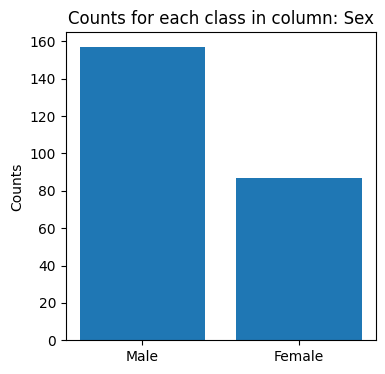

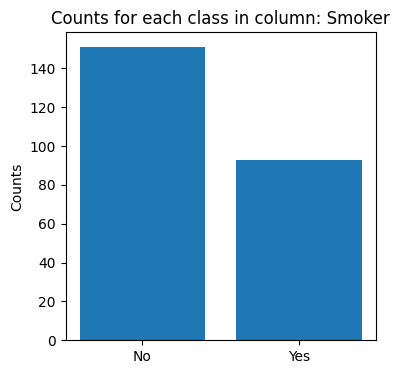

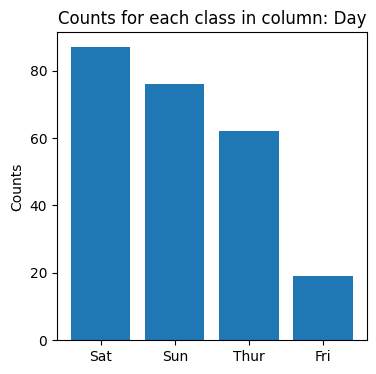

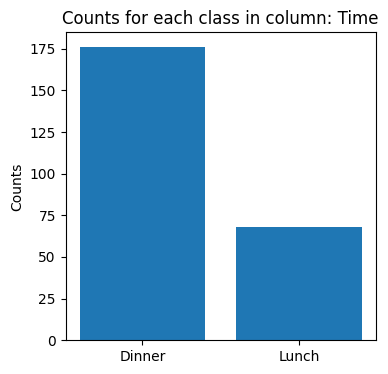

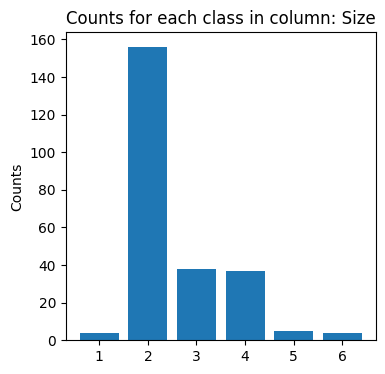

In [14]:
for col in cat_cols:
    category_counts = df[col].value_counts()
    idx, vals = category_counts.index, category_counts.values

    plt.figure(figsize = (4, 4))
    plt.title("Counts for each class in column: " + col.title())
    plt.bar(x = idx, height = vals)
    plt.ylabel("Counts")
    plt.show()

In [15]:
# Sum of Total Bill per group
compare_column_totals(data = df,
                      column = "total_bill",
                      groups = ["tip", "sex", "smoker", "day", "time", "size"])

tip
2.00    521.36
3.00    498.64
5.00    326.93
4.00    256.19
3.50    201.15
         ...  
1.32      9.68
1.45      9.55
1.92      8.58
1.48      8.52
5.15      7.25
Name: total_bill, Length: 123, dtype: float64 

sex
Male      3256.82
Female    1570.95
Name: total_bill, dtype: float64 

smoker
No     2897.43
Yes    1930.34
Name: total_bill, dtype: float64 

day
Sat     1778.40
Sun     1627.16
Thur    1096.33
Fri      325.88
Name: total_bill, dtype: float64 

time
Dinner    3660.30
Lunch     1167.47
Name: total_bill, dtype: float64 

size
2    2565.89
4    1058.70
3     884.55
5     150.34
6     139.32
1      28.97
Name: total_bill, dtype: float64 



In [16]:
# Sum of Tip per group
compare_column_totals(data = df,
                      column = "tip",
                      groups =["total_bill", "sex", "smoker", "day", "time", "size"])

total_bill
50.81    10.00
48.33     9.00
39.42     7.58
20.69     7.45
17.92     7.16
         ...  
12.90     1.10
16.99     1.01
5.75      1.00
12.60     1.00
3.07      1.00
Name: tip, Length: 229, dtype: float64 

sex
Male      485.07
Female    246.51
Name: tip, dtype: float64 

smoker
No     451.77
Yes    279.81
Name: tip, dtype: float64 

day
Sat     260.40
Sun     247.39
Thur    171.83
Fri      51.96
Name: tip, dtype: float64 

time
Dinner    546.07
Lunch     185.51
Name: tip, dtype: float64 

size
2    402.84
4    153.01
3    128.94
6     20.90
5     20.14
1      5.75
Name: tip, dtype: float64 



<a class="anchor" id="day-profit"></a>
## What day of the week is most profitable for the restaurant?

In [17]:
# Pivot Table - Total Bill by Weekday
total_bill_day = pd.pivot_table(df,
               "total_bill",
               index = ["day"],
               aggfunc = "sum").reset_index() \
.sort_values("total_bill", ascending = False)
total_bill_day

,day,total_bill
1,Sat,1778.40
2,Sun,1627.16
3,Thur,1096.33
0,Fri,325.88


In [18]:
# Pivot Table - Total Bill by Weekday and Time of day
total_bill_daytime = pd.pivot_table(df,
               "total_bill",
               index = ["day", "time"],
               aggfunc = "sum").reset_index() \
.sort_values("total_bill", ascending = False)
total_bill_daytime

,day,time,total_bill
2,Sat,Dinner,1778.40
3,Sun,Dinner,1627.16
5,Thur,Lunch,1077.55
0,Fri,Dinner,235.96
1,Fri,Lunch,89.92
4,Thur,Dinner,18.78


Text(0.5, 1.0, 'Total Bill Amounts by Weekday')

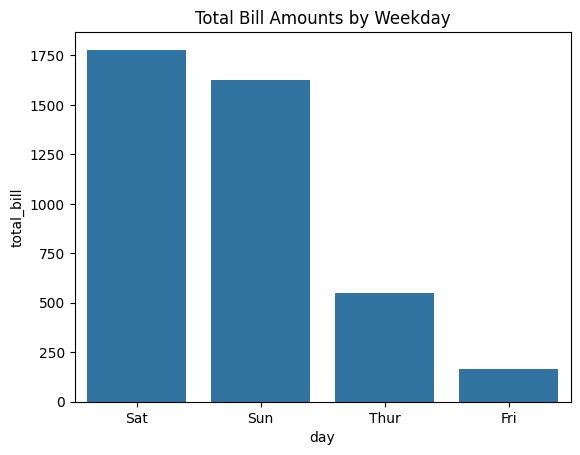

In [19]:
sns.barplot(x = "day",
            y = "total_bill",
            data = total_bill_daytime,
            errorbar = None)
plt.title("Total Bill Amounts by Weekday")

According the bar chart above, the weekends (**Saturday** and **Sunday**) are the most profitable days of the week for Casa di Gusto.

Saturdays reported a total of $\$1778.40$.<br>

Sundays reported a total of $\$1627.16$.<br>

Thursdays reported a total of $\$1096.33$.<br>

Fridays reported a total of $\$325.88$.<br>

<a class="anchor" id="time-profit"></a>
## What time of day is most profitable for the restaurant?

Text(0.5, 1.0, 'Total Bill Amounts by Weekday and Time of Day')

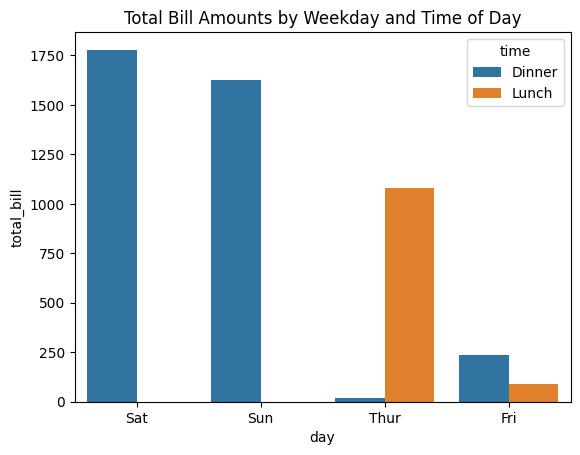

In [20]:
sns.barplot(x = "day",
            y = "total_bill",
            hue = "time",
            data = total_bill_daytime)
plt.title("Total Bill Amounts by Weekday and Time of Day")

Text(0.5, 1.0, 'Counts of records by Weekday and Time of Day')

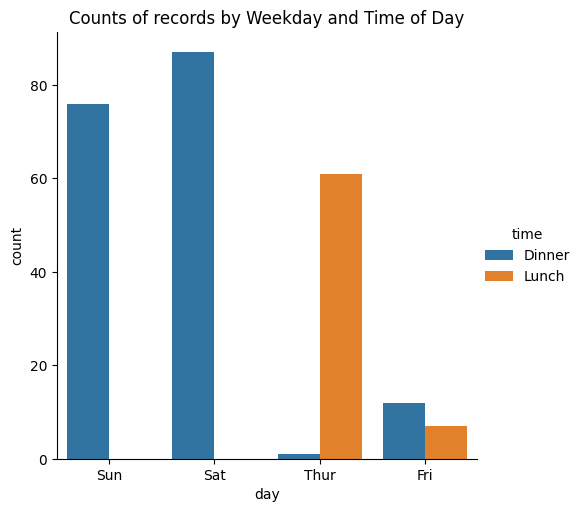

In [21]:
sns.catplot(x = "day",
            kind = "count",
            hue = "time",
            data = df)
plt.title("Counts of records by Weekday and Time of Day")

In [22]:
le = LabelEncoder()

# Translates categorical variable data into integer labels for easier analysis
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

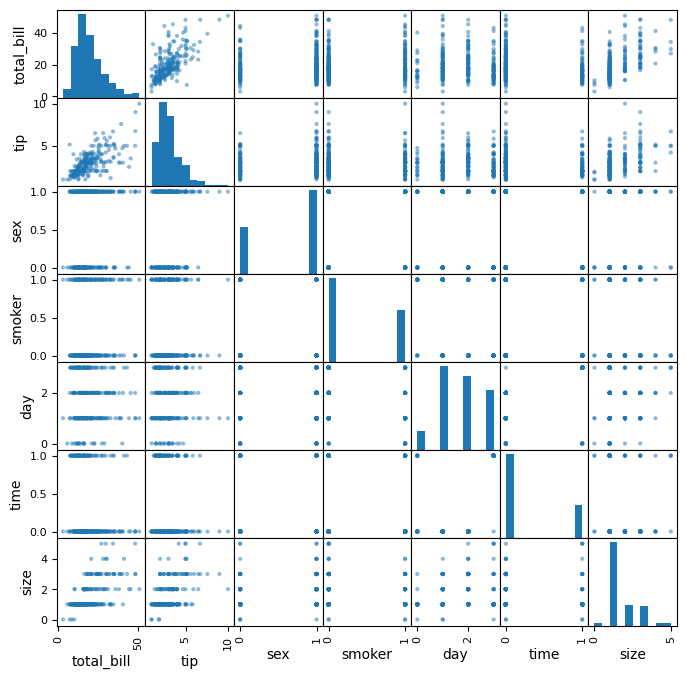

In [23]:
pd.plotting.scatter_matrix(df, figsize = (8, 8), range_padding = 0.16);

Judging by the scatter matrix plot above, there seems to be some linear correlation between **Tip** and **Total Bill**. Correlations between other variables is less clear.

Text(0.5, 1.0, 'Histogram of Total Bill Amounts')

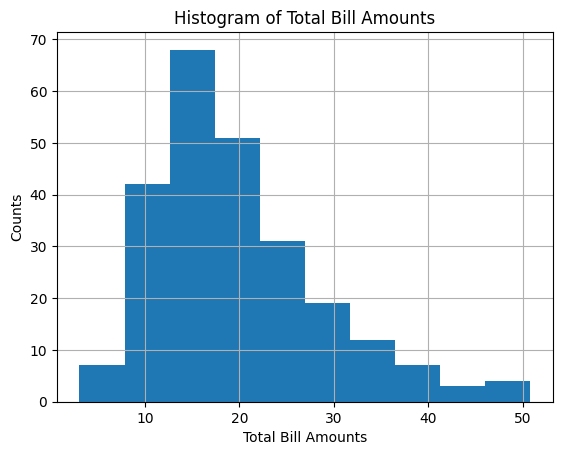

In [24]:
df["total_bill"].hist()
plt.xlabel("Total Bill Amounts")
plt.ylabel("Counts")
plt.title("Histogram of Total Bill Amounts")

Text(0, 0.5, 'Total Bill Amount in USD ($)')

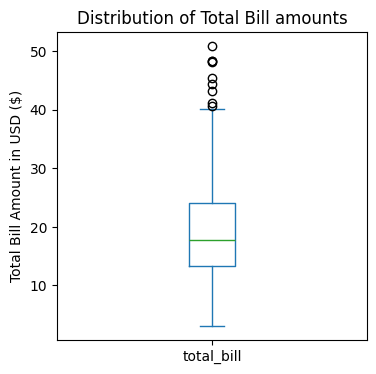

In [25]:
plt.title("Distribution of Total Bill amounts")
df["total_bill"].plot.box(figsize = (4, 4))
plt.ylabel("Total Bill Amount in USD ($)")

Text(0.5, 1.0, 'Histogram of Tip Amounts')

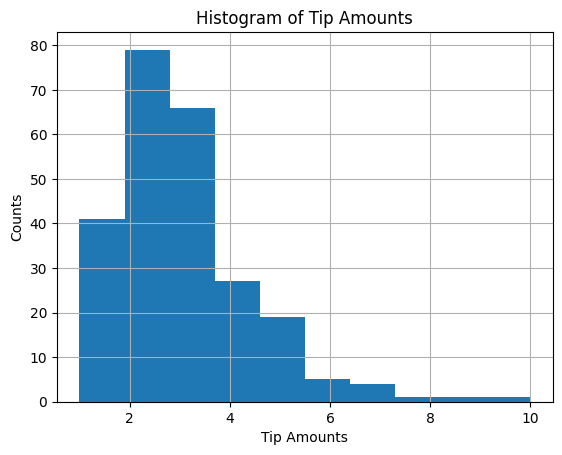

In [26]:
df["tip"].hist()
plt.xlabel("Tip Amounts")
plt.ylabel("Counts")
plt.title("Histogram of Tip Amounts")

<Figure size 200x100 with 0 Axes>

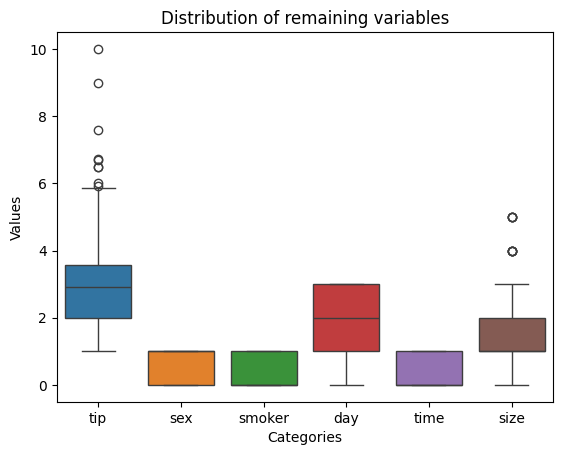

<Figure size 200x100 with 0 Axes>

In [27]:
plt.title("Distribution of remaining variables")
sns.boxplot(df[df.columns[1:]])
plt.ylabel("Values")
plt.xlabel("Categories")
plt.figure(figsize = (2, 1))

<a class="anchor" id="avg-customer"></a>
## Who is Casa di Gusto's average customer?
In order to answer the client's question: "Who is our average customer?", I employed descriptive statistics and data visualization to form a basic **customer persona**, or a generalization of a business' customer base used for creating more efficient, effective, and targeted sales and marketing strategies. According to the previous tables and bar charts, I have narrowed down Casa di Gusto's customer persona to a set of the most common behaviors and characteristics as recorded in the dataset.


<img alt="Simple line-art depicting a dark-skinned man who has a beard. He is wearing a button-down shirt and a red tie." src="https://ghost.noissue.co/content/images/size/w1000/2021/01/Illustration-Personas-05--1-.png" width=300 height=500 />

### Wesley "On the Weekend" Watts
According to the data gathered so far, a Casa di Gusto customer most likely...
- Is a Man.
- Pays about $\$19.78$ for a meal, give or take $\$8.90$.
- Does not smoke.
- Prefers to dine on the weekends.
- Prefers dinner to lunch (especially on the weekends).
- Usually brings $1$ person to eat with (Party of $2$).
- Usually tips between $\$2$ and $\$3.50$.

In [28]:
# A correlation matrix consisting of all numerical datatypes
corr_matrix = df.corr()

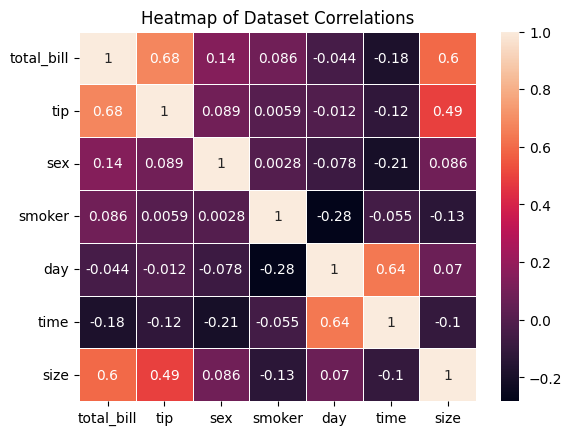

In [29]:
# Simple answer for checking for correlation across the dataset
sns.heatmap(corr_matrix, annot = True, linewidths = 0.5)
plt.title("Heatmap of Dataset Correlations")
plt.yticks(rotation=0);

Looking at the above heatmap, we can observe the strong, positively correlated relationship between **Total Bill** and **Tip** at a value of $0.68$. Anything over |$0.50$| is considered a strong correlation, so this is a notable observation.<br>
**Total Bill** is also strongly, positively correlated with **Size** at $0.60$. **Tip** also appears correlated with **Size**, but with a weaker relationship at $0.49$.<br>
An interesting, but possibly less useful observation is that **Day** and **Time** are strongly, positively correlated at $0.64$.

<a class="anchor" id="tip-corr"></a>
## Which variables are most correlated with tip amounts?

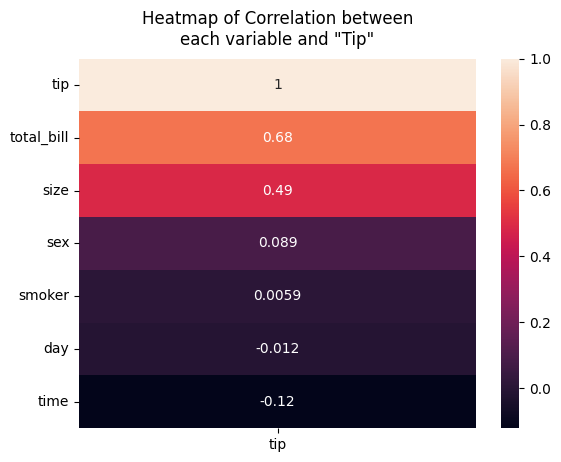

In [30]:
# Simple answer for checking for correlation to 'Tip'
tip_corr_matrix = pd.DataFrame(corr_matrix.T["tip"].sort_values(ascending = False))
sns.heatmap(tip_corr_matrix, annot = True)
plt.title("Heatmap of Correlation between\neach variable and \"Tip\"", pad = 10.0);
plt.yticks(rotation=0)
plt.show()

According to the heatmap above, the variable most strongly correlated with tip amounts are: **Total Bill** and **Size**.
- Tip and Total Bill are **strongly, positively correlated** at $0.68$
- Tip and [Party] Size are **weakly, positively correlated** at $0.49$

<a class="anchor" id="ttlbill-corr"></a>
## Which variables are most correlated with total bill amounts?

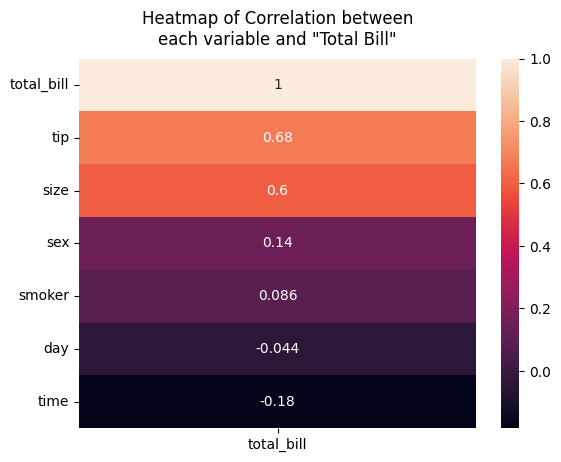

In [31]:
# Simple answer for checking for correlation to 'total_bill'
totalbill_corr_matrix = pd.DataFrame(corr_matrix.T["total_bill"].sort_values(ascending = False))
sns.heatmap(totalbill_corr_matrix, annot = True)
plt.title("Heatmap of Correlation between\neach variable and \"Total Bill\"", pad = 10.0);
plt.yticks(rotation=0)
plt.show()

According to the heatmap above, the variable most correlated with tip amounts are: **Total Bill** and **Size**.
- Total Bill and Tip are **strongly, positively correlated** at $0.68$
- Total Bill and [Party] Size are **strongly, positively correlated** at $0.60$
- Total Bill and Time are **weakly, negatively correlated** at $-0.18$

<a class="anchor" id="conclusions"></a>
# Conclusions
1. [**What day of the week is most profitable for the restaurant?**](#day-profit)<br>
    **Saturdays** reported a total of $\$1778.40$. <br>
    
    **Sundays** reported a total of $\$1627.16$.
2. [**What time of day is most profitable for the restaurant?**](#time-profit)<br>
    On the weekends: **Dinner**<br>
    
    On Thursdays: **Lunch**
3. [**Who is their average customer?**](#avg-customer)<br>
    **Wesley "On the Weekend" Watts**, a Casa di Gusto Customer Persona
4. [**Which of the variables are most correlated with tip amounts?**](#tip-corr)<br>
    **Total Bill Amount** and **Party Size**
5. [**Which of the variables are most correlated with total bill amounts?**](#ttlbill-corr)<br>
    **Tip Amount** and **Party Size**
    


In [32]:
data = df

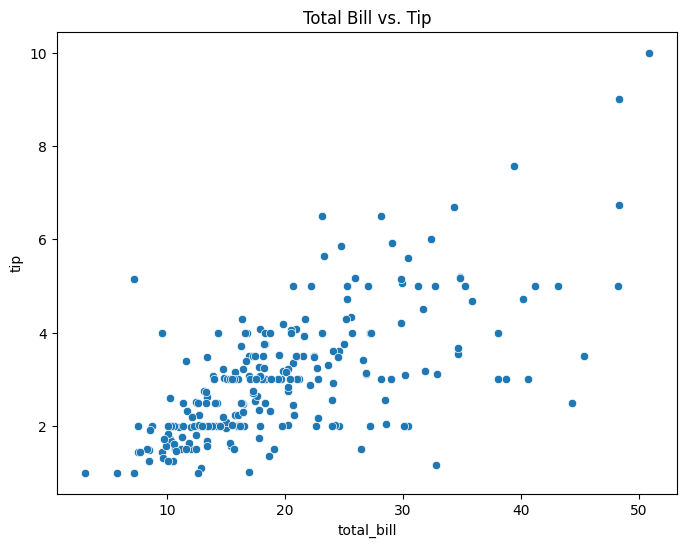

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.title('Total Bill vs. Tip')
plt.show()

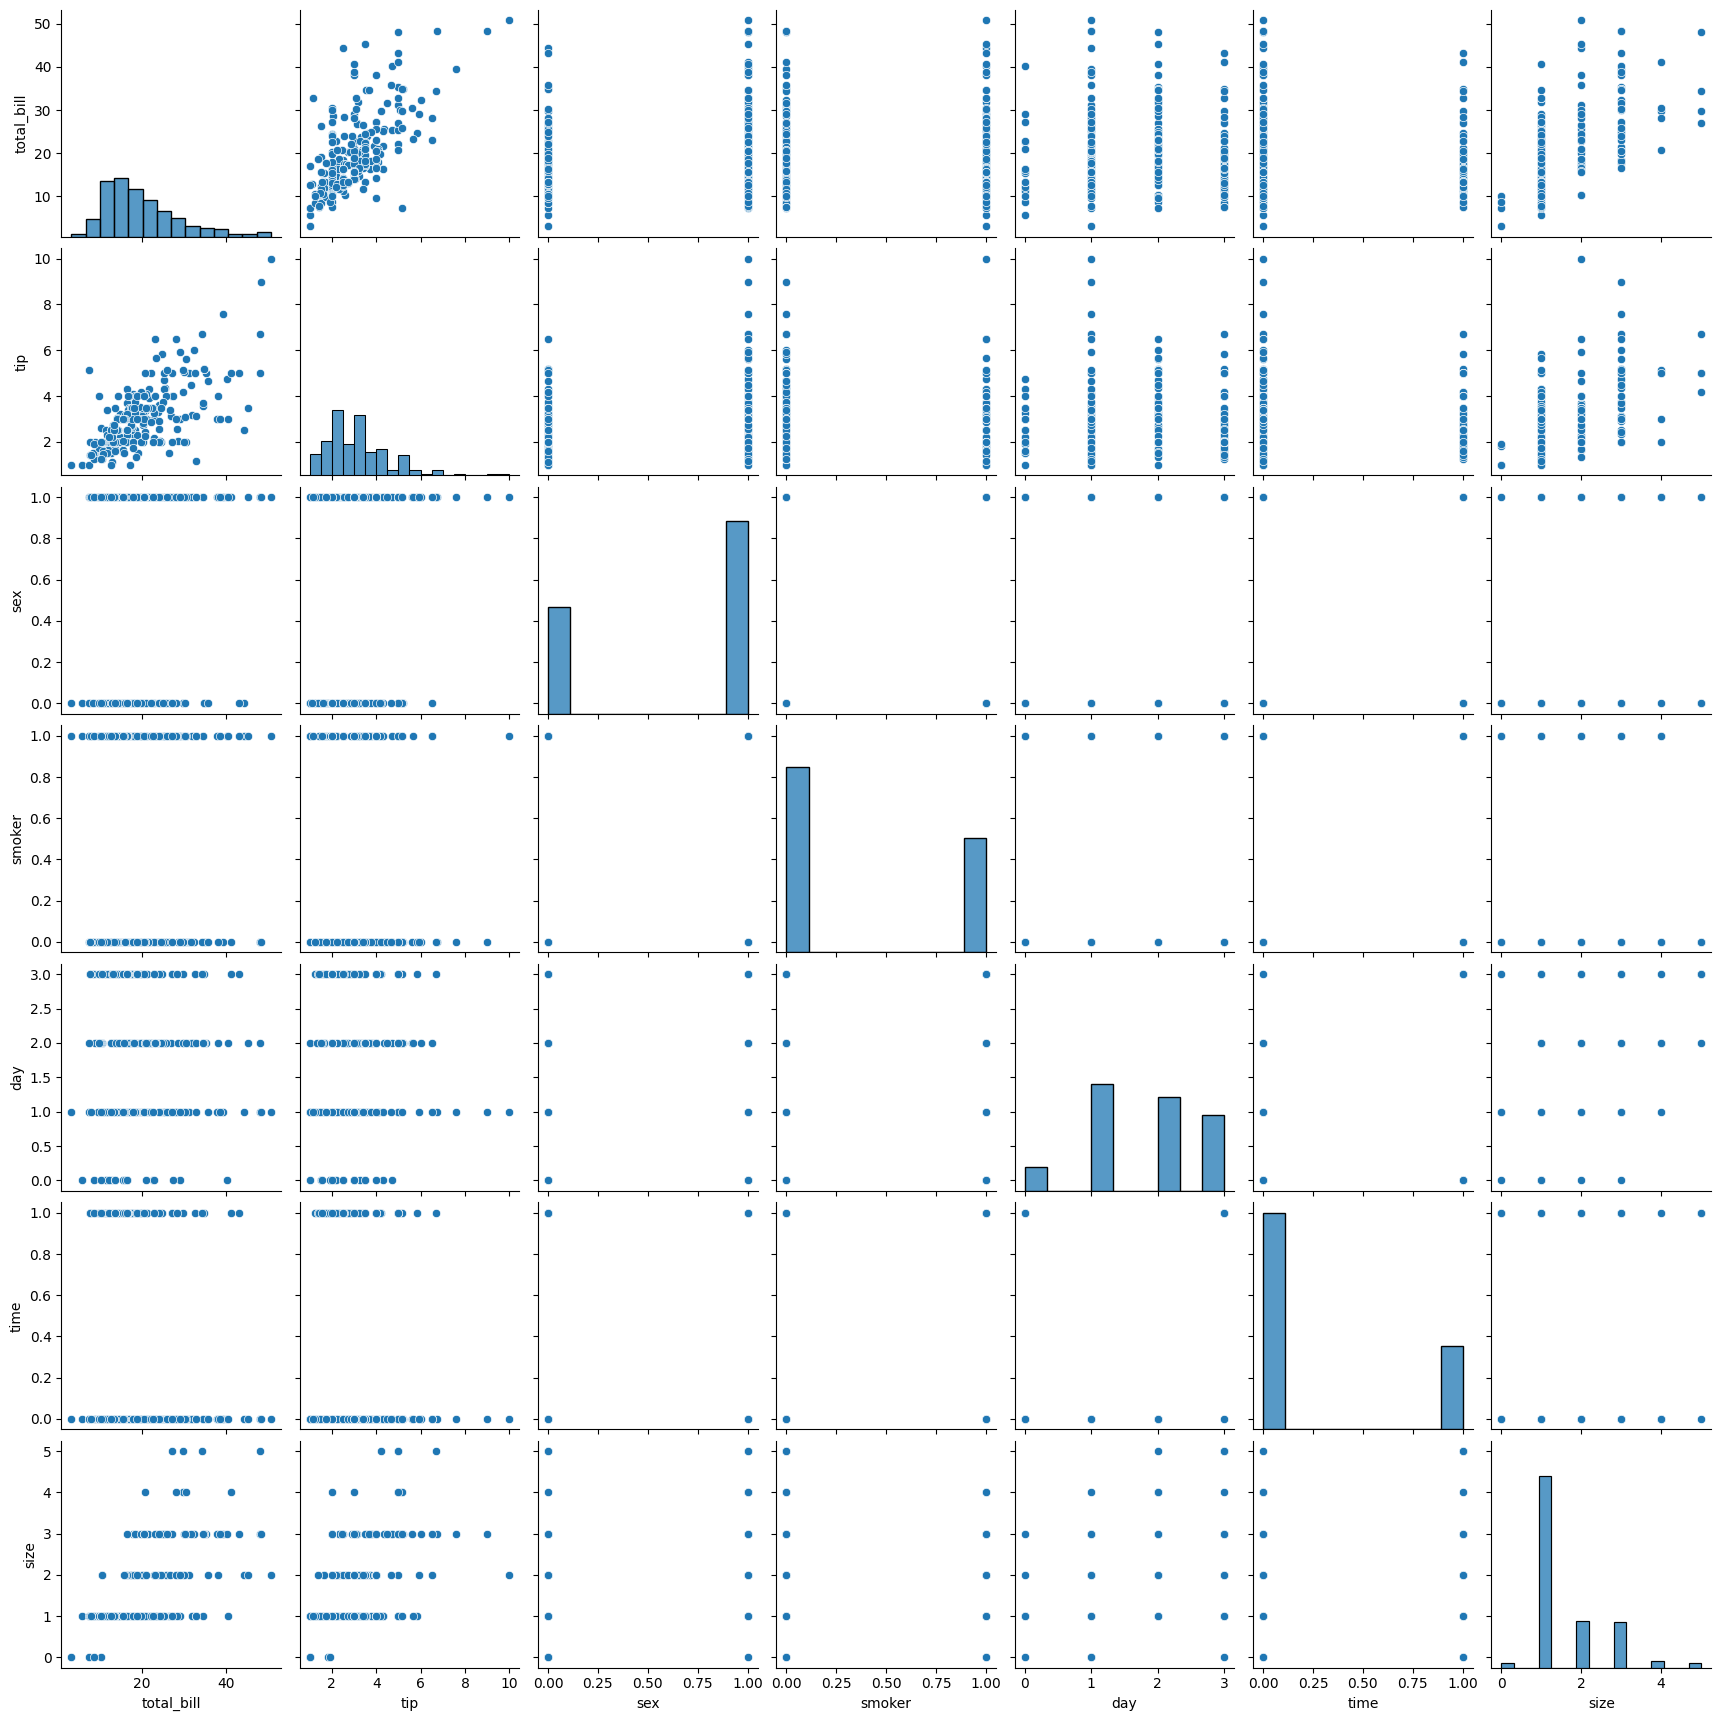

In [34]:
sns.pairplot(data)
plt.show()

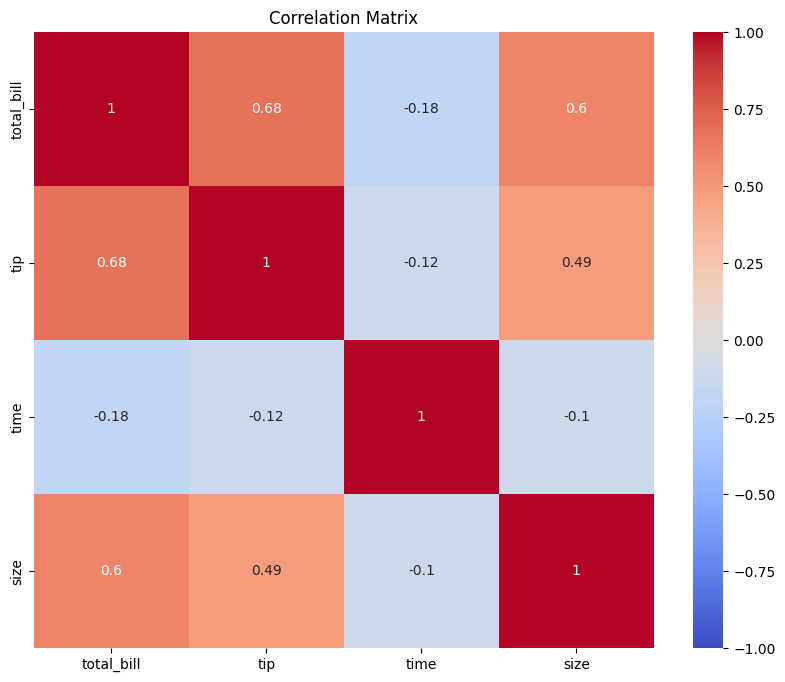

In [35]:
import numpy as np

# Convert categorical features to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['sex','smoker','day'], drop_first=True) # Assuming 'sex' is the categorical column with 'Female'

# Select only numerical features for correlation calculation
numerical_features = data_encoded.select_dtypes(include=np.number)  # Select numerical columns

# Now calculate the correlation matrix and plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [36]:
import statsmodels.api as sm

# Assuming 'size' is one of the features you want to include besides 'total_bill'
X = data[['total_bill', 'size']]  # Replace 'size' with the actual column name if needed
y = data['tip']
# Add a constant term to the independent variables
X = sm.add_constant(X)
# Use sm.OLS instead of smf.OLS
model = sm.OLS(y, X).fit()
rainbow_stat, rainbow_p_val = linear_rainbow(model)
print(f'Rainbow test statistic: {rainbow_stat}, p-value: {rainbow_p_val}')

Rainbow test statistic: 1.1902656646832817, p-value: 0.17048935693447634


**Interpretation: A low p-value (<0.05) suggests that linearity may not hold, indicating that a non-linear model could be more suitable.**

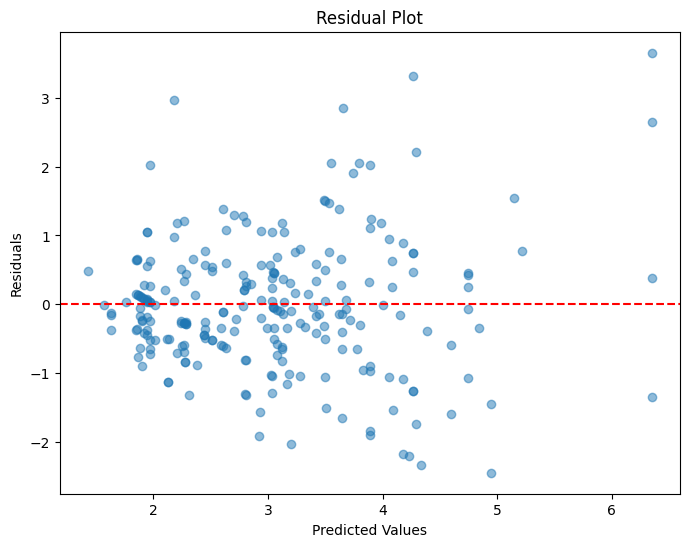

In [42]:
# Residual Plot
plt.figure(figsize=(8, 6))
predictions = model.predict(X)
residuals = y - predictions
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [44]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'KNN Regression': KNeighborsRegressor()
}

# Train each model and evaluate prediction accuracy
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate model accuracy metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} - MSE: {mse:.2f}, R^2: {r2:.2f}")


Linear Regression - MSE: 0.82, R^2: 0.59
Ridge Regression - MSE: 0.82, R^2: 0.59
Lasso Regression - MSE: 0.90, R^2: 0.55
Decision Tree - MSE: 1.87, R^2: 0.07
Random Forest - MSE: 1.04, R^2: 0.48
Support Vector Regression - MSE: 0.90, R^2: 0.55
KNN Regression - MSE: 1.03, R^2: 0.49


# **Identifying which factors significantly impact tip amounts.**

        Feature  Importance
0    total_bill    0.775180
1          size    0.053400
4     smoker_No    0.045997
5    smoker_Yes    0.029394
7       day_Sat    0.023417
8       day_Sun    0.022968
2    sex_Female    0.012430
3      sex_Male    0.010720
9      day_Thur    0.007465
11   time_Lunch    0.006539
10  time_Dinner    0.006481
6       day_Fri    0.006009


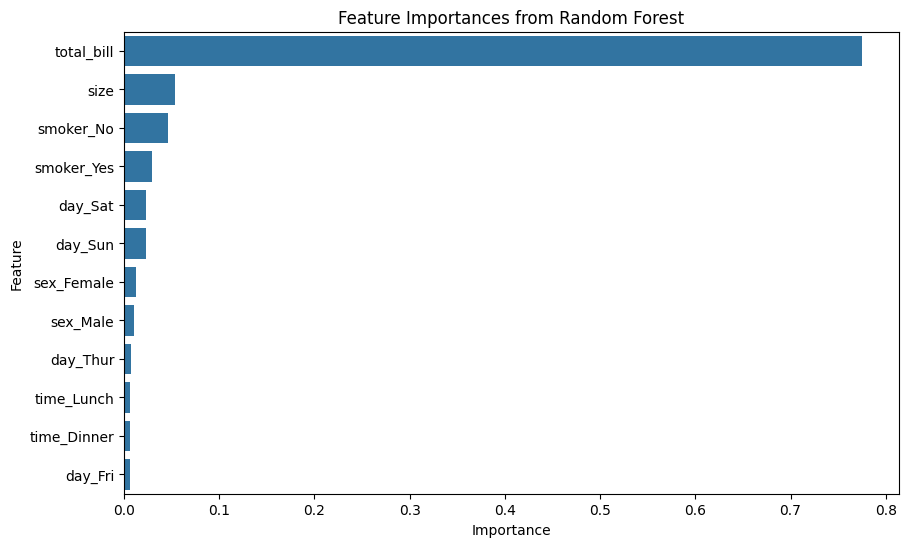

In [49]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
# Assuming 'df' is your Pandas DataFrame

# Fit RandomForestRegressor
# Create a copy of the dataframe before dropping the tip column, otherwise the original df will be modified.
X = df.copy()
# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['sex', 'smoker', 'day', 'time']) # Assuming these are your categorical columns
#Now that sex, smoker, day, and time are numerical, drop the tip column from X.
y = X['tip']
X = X.drop(columns=['tip'])
#Continue with the model fit.
model_rf = RandomForestRegressor()
model_rf.fit(X, y)

# Get feature importances
importances = model_rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plot feature importances
# import necessary modules for plotting
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()

<a class="anchor" id="future-directions"></a>

# Result Interpretetion:
**Interpreting Model Results: Based on model accuracy and feature importance, recommendations are:**

**1. Service Training: If the total_bill is significant, we suggest encouraging tips through excellent service.**

**2. Table Management: Higher tips from larger tables can be used to guide seating strategies.**

# Future Directions:
**As stated earlier, the client had previously expressed interest in future directions. I have outlined three possible projects to pursue using the same dataset but for predictive purposes rather than descriptive.**

**1. Apply a linear regression to correlated data (such as, *Total Bill* and *Tip* or *Total Bill* and *Size*) and score the model's performance. (OLS Regression)**

**2. Given some data about a customer, what are the odds we would we expect them to tip greater-than-or-equal-to the average tip amount? (Binary Classification)**

**3. Create even more targeted personas by implementing clustering techniques. (Clustering Analysis)**